In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv("session_csv.csv") # reads the csv and creates the dataframe called movie
df.tail()
# len(df)

,id,action,value,created_at,user_id
6641,11068,enter,ติดต่อเรา,2018-04-27 13:26:17.652929+00,270
6642,11069,enter,home,2018-04-27 13:29:05.032675+00,270
6643,11070,enter,home,2018-04-27 13:30:45.78871+00,270
6644,11071,enter,home,2018-04-27 13:36:33.089346+00,270
6645,11072,enter,ติดต่อเรา,2018-04-27 13:37:11.166481+00,270


In [2]:
df_session_dummies = pd.get_dummies(df, columns=['action'])
# df_session_dummies.head(n=2)
# df_session_dummies_drop=df_session_dummies.drop(['created_at','value',],1)
df_session_dummies.head()

,id,value,created_at,user_id,action_click recommended menu,action_click recommended menues,action_click_genetic_rec,action_enter,action_enter_store,action_like,action_search_cate,action_search_input,action_กรอกประวัติความหิว,action_สั่งอาหาร,action_เพิ่มเข้าตะกร้า,action_ใช้โค้ด
0,1144,home,2018-02-21 08:30:45.169158+00,52,0,0,0,1,0,0,0,0,0,0,0,0
1,1148,home,2018-02-21 10:07:01.98235+00,52,0,0,0,1,0,0,0,0,0,0,0,0
2,1152,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52,0,0,0,0,0,0,0,0,0,0,1,0
3,1160,76,2018-02-21 10:15:29.73492+00,52,0,0,0,0,0,0,0,0,0,1,0,0
4,411,home,2018-02-16 10:25:31.747361+00,18,0,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df_search_cate = df_session_dummies[df_session_dummies.action_search_cate == 1 ]
df_search_cate=df_search_cate.drop(['action_click recommended menues','action_click recommended menu','action_click_genetic_rec','action_enter','action_enter_store','action_like','action_search_input','action_กรอกประวัติความหิว','action_สั่งอาหาร','action_เพิ่มเข้าตะกร้า','action_ใช้โค้ด'],1)

df_search_cate.head()


,id,value,created_at,user_id,action_search_cate
14,421,ของหวาน,2018-02-16 12:52:29.774393+00,18,1
15,422,สเต็ก,2018-02-16 12:52:39.479332+00,18,1
16,423,ปิ้งย่าง,2018-02-16 12:52:43.535009+00,18,1
17,424,ปิ้งย่าง,2018-02-16 12:52:43.673708+00,18,1
18,425,ชาบู,2018-02-16 12:52:47.878474+00,18,1


In [4]:
df_search_cate = df_search_cate.dropna()
df_search_cate_dummies = pd.get_dummies(df_search_cate, columns=['value'])
df_search_cate_dummies.head()

,id,created_at,user_id,action_search_cate,value_about-ginim,value_all,value_delivery,value_ของหวาน,value_ชาบู,value_ปิ้งย่าง,value_สเต็ก,value_อาหารญี่ปุ่น,value_อาหารเกาหลี,value_อาหารไทย,value_เครื่องดื่ม
14,421,2018-02-16 12:52:29.774393+00,18,1,0,0,0,1,0,0,0,0,0,0,0
15,422,2018-02-16 12:52:39.479332+00,18,1,0,0,0,0,0,0,1,0,0,0,0
16,423,2018-02-16 12:52:43.535009+00,18,1,0,0,0,0,0,1,0,0,0,0,0
17,424,2018-02-16 12:52:43.673708+00,18,1,0,0,0,0,0,1,0,0,0,0,0
18,425,2018-02-16 12:52:47.878474+00,18,1,0,0,0,0,1,0,0,0,0,0,0


In [5]:
# df_search_cate_dummies.iloc/[1]['user_id']
df_search_cate_dummies[df_search_cate_dummies['user_id']== 18].index


Int64Index([14, 15, 16, 17, 18, 19, 60, 62, 1053, 1054, 2513, 2517, 2518, 2519,
            2520],
           dtype='int64')

In [8]:
new_df = pd.DataFrame(columns = ['user_id','value_all','value_delivery','value_ของหวาน','value_ชาบู','value_ปิ้งย่าง','value_สเต็ก',
        'value_อาหารญี่ปุ่น','value_อาหารเกาหลี','value_อาหารไทย','value_เครื่องดื่ม',])
for k,i in df_search_cate_dummies.iterrows():
    if any(new_df.user_id == i['user_id']) :

        index=new_df[new_df['user_id']== i['user_id']].index.item()
        
        
        if new_df.iloc[index]['value_all'] == 0  :
            new_df.set_value(index, 'value_all', i['value_all'])
        if new_df.iloc[index]['value_delivery'] == 0 :
            new_df.set_value(index, 'value_delivery',  i['value_delivery'])
        if new_df.iloc[index]['value_ของหวาน'] == 0 :
            new_df.set_value(index, 'value_ของหวาน',  i['value_ของหวาน'])
        if new_df.iloc[index]['value_ชาบู'] == 0  :
            new_df.set_value(index, 'value_ชาบู', i['value_ชาบู'])
        if new_df.iloc[index]['value_ปิ้งย่าง'] == 0  :
            new_df.set_value(index, 'value_ปิ้งย่าง', i['value_ปิ้งย่าง'])
        if new_df.iloc[index]['value_สเต็ก'] == 0  :
            new_df.set_value(index, 'value_สเต็ก', i['value_สเต็ก'])
        if new_df.iloc[index]['value_อาหารญี่ปุ่น'] == 0  :
            new_df.set_value(index, 'value_อาหารญี่ปุ่น', i['value_อาหารญี่ปุ่น'])
        if new_df.iloc[index]['value_อาหารเกาหลี'] == 0  :
            new_df.set_value(index, 'value_อาหารเกาหลี', i['value_อาหารเกาหลี'])
        if new_df.iloc[index]['value_อาหารไทย'] == 0  :
            new_df.set_value(index, 'value_อาหารไทย', i['value_อาหารไทย'])
        if new_df.iloc[index]['value_เครื่องดื่ม'] == 0  :
            new_df.set_value(index, 'value_เครื่องดื่ม', i['value_เครื่องดื่ม'])
   


    else :
        new_df.loc[len(new_df)] = [i['user_id'],i['value_all'],i['value_delivery'],i['value_ของหวาน'],
                                   i['value_ชาบู'],i['value_ปิ้งย่าง'],i['value_สเต็ก'],i['value_อาหารญี่ปุ่น'],
                                   i['value_อาหารเกาหลี'],i['value_อาหารไทย'],i['value_เครื่องดื่ม']]
                                       

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .ia

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13, cost: 489.0
Run 1, iteration: 2/100, moves: 0, cost: 489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 367.0
Run 2, iteration: 2/100, moves: 2, cost: 367.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 410.0
Run 3, iteration: 2/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 422.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17, cost: 457.0
Run 5, iteration: 2/100, moves: 1, cost: 457.0
Best run was number 2


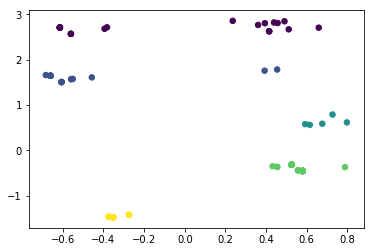

In [42]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = new_df.reset_index().values

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
new_df['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(new_df.ix[:,1:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

In [43]:

# df_search_cate_dummies
# df_session_dummies_drop
# df_search_cate_dummies.to_csv('search_cate.csv', encoding='utf-8', index=False)
new_df =new_df.sort_values(by=['clusters'])
new_df
new_df.to_csv('searchCate_clustering.csv', encoding='utf-8', index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


4
Estimated number of clusters: 4
Silhouette Coefficient: 0.813


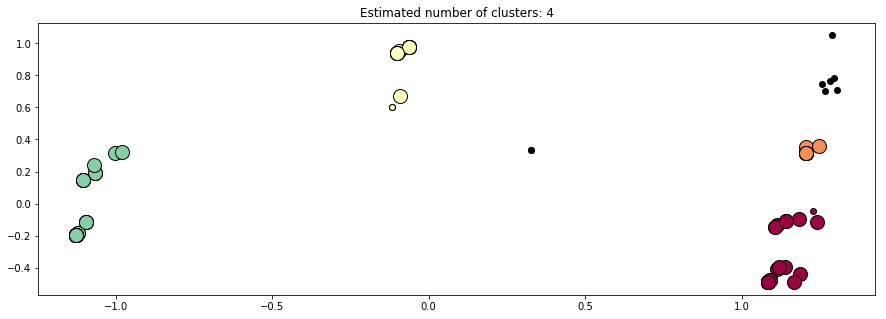

In [12]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(new_df.ix[:,1:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
# df_sort = df_session_dummies_drop.sort_values(by=['clusters'])
# df_sort.to_csv('enter_store_clustering.csv', encoding='utf-8', index=False)

In [6]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 795.0
Run 1, iteration: 2/100, moves: 1, cost: 795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 20, cost: 793.0
Run 2, iteration: 2/100, moves: 11, cost: 792.0
Run 2, iteration: 3/100, moves: 2, cost: 792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 19, cost: 802.0
Run 3, iteration: 2/100, moves: 7, cost: 801.0
Run 3, iteration: 3/100, moves: 0, cost: 801.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 800.0
Run 4, iteration: 2/100, moves: 3, cost: 800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 24, cost: 800.0
Run 5, iteration: 2/100, moves: 4, cost: 796.0
Run 5, iteration: 3/100, moves

In [77]:
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

df = read_csv("credit_count.txt")
Y = df[df.CARDHLDR == 1].DEFAULTS
X = df[df.CARDHLDR == 1].ix[:, 2:12]
# SCALE EACH FEATURE INTO [0, 1] RANGE
sX = minmax_scale(X, axis = 0)
ncol = sX.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(sX, Y, train_size = 0.5, random_state = seed(2017))

### AN EXAMPLE OF SIMPLE AUTOENCODER ###
# InputLayer (None, 10)
#      Dense (None, 5)
#      Dense (None, 10)

input_dim = Input(shape = (ncol, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYER
encoded = Dense(encoding_dim, activation = 'relu')(input_dim)
# DEFINE THE DECODER LAYER
decoded = Dense(ncol, activation = 'sigmoid')(encoded)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input = input_dim, output = decoded)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, nb_epoch = 50, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input = input_dim, output = encoded)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]
#array([[ 0.        ,  1.26510417,  1.62803197],
#       [ 2.32508397,  0.99735016,  2.06461048]], dtype=float32)
# In the next example, we will relax the constraint of layers and employ a stack of layers to achievement the same purpose as above.

### AN EXAMPLE OF DEEP AUTOENCODER WITH MULTIPLE LAYERS
# InputLayer (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)
#      Dense (None, 5)
#      Dense (None, 3)
#      Dense (None, 5)
#      Dense (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)

input_dim = Input(shape = (ncol, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(20, activation = 'relu')(input_dim)
encoded2 = Dense(10, activation = 'relu')(encoded1)
encoded3 = Dense(5, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(5, activation = 'relu')(encoded4)
decoded2 = Dense(10, activation = 'relu')(decoded1)
decoded3 = Dense(20, activation = 'relu')(decoded2)
decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input = input_dim, output = decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, nb_epoch = 100, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input = input_dim, output = encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]
#array([[ 3.74947715,  0.        ,  3.22947764],
#       [ 3.93903661,  0.17448257,  1.86618853]], dtype=float32)

ModuleNotFoundError: No module named 'keras'